In [1]:
import numpy as np
from gradvi.priors import Ash
from gradvi.inference import  LinearRegression

In [2]:
n = 100
p = 200
pcausal = 20
s2 = 1.4
np.random.seed(100)

X = np.random.normal(0, 1, size = n * p).reshape(n, p)
b = np.zeros(p)
b[:pcausal] = np.random.normal(0, 1, size = pcausal)
err = np.random.normal(0, np.sqrt(s2), size = n)
y = np.dot(X, b) + err

In [3]:
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

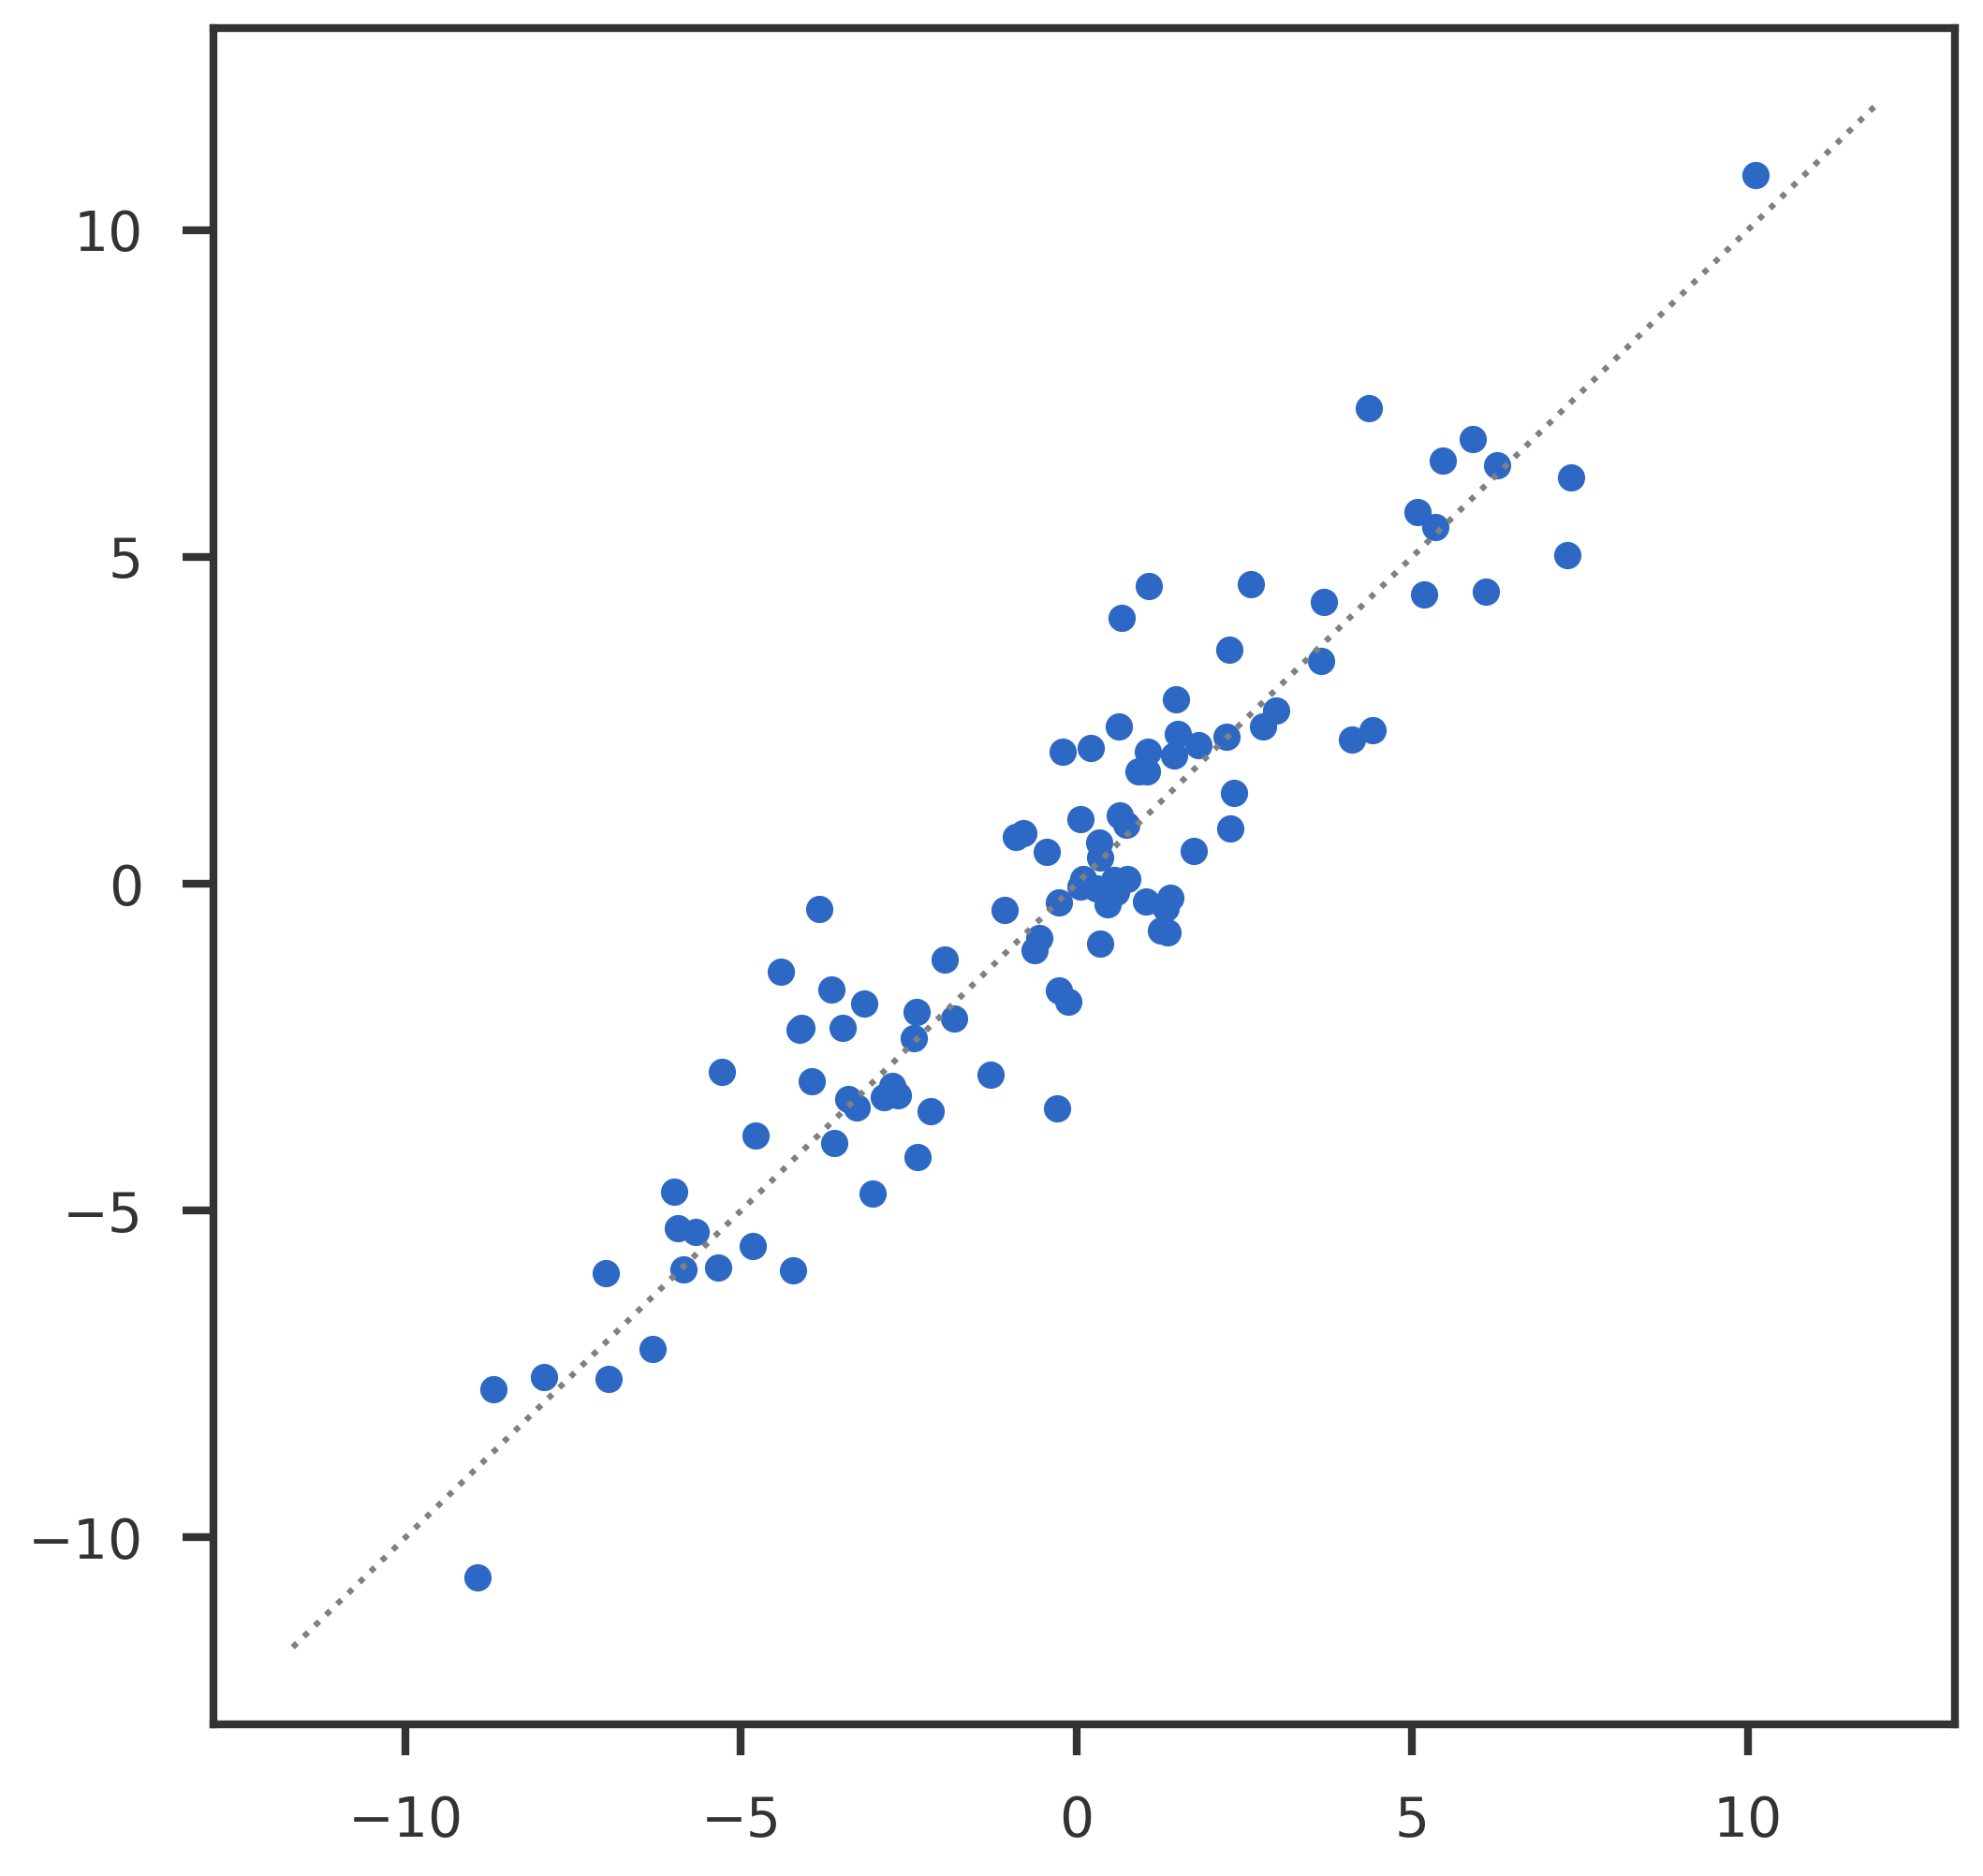

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.dot(X, b), y)
mpl_utils.plot_diag(ax1)
plt.show()

In [5]:
k = 10
sk = (np.power(2.0, np.arange(k) / k) - 1)
print(sk)

[0.         0.07177346 0.14869835 0.23114441 0.31950791 0.41421356
 0.51571657 0.62450479 0.74110113 0.86606598]


In [8]:
prior = Ash(sk, scaled = True)
gvlin = LinearRegression(debug = False, display_progress = False)
gvlin.fit(X, y, prior)

2022-04-21 14:35:48,379 | gradvi.inference.linear_regression | INFO | Terminated at iteration 283.


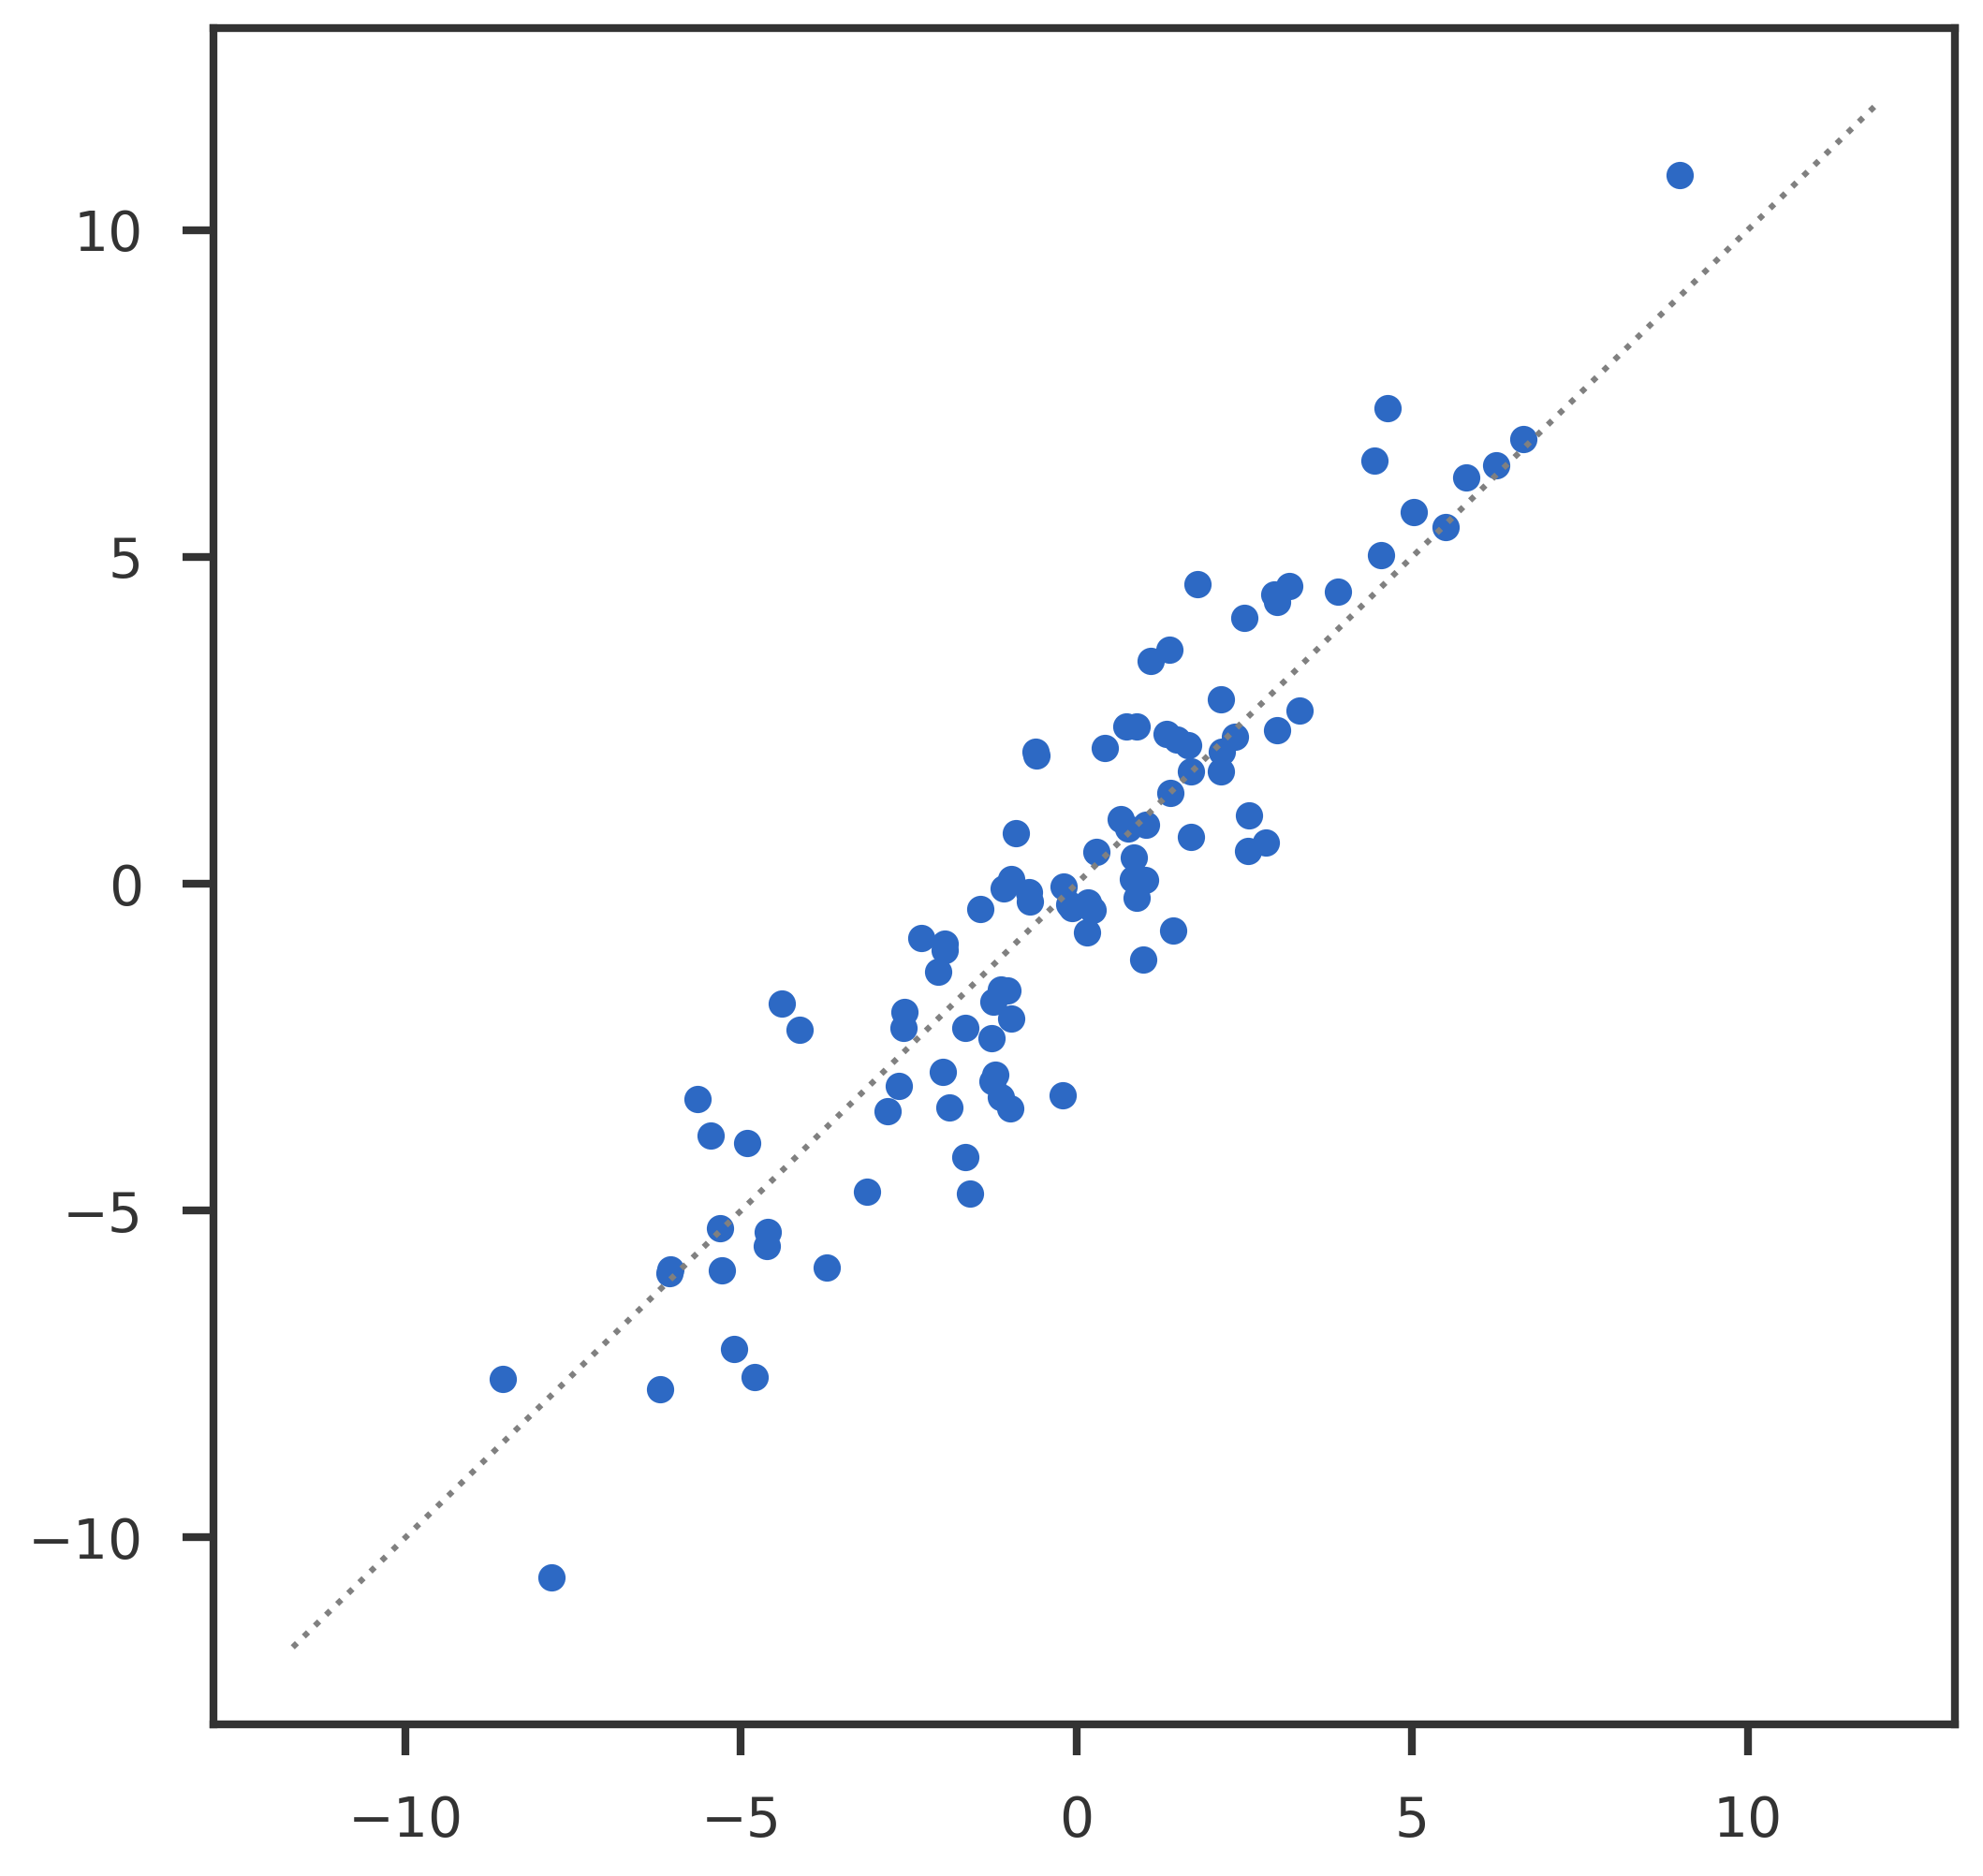

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.dot(X, gvlin.coef), y)
mpl_utils.plot_diag(ax1)
plt.show()